<a href="https://colab.research.google.com/github/reservamos/colabs/blob/main/rapid7_logs_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

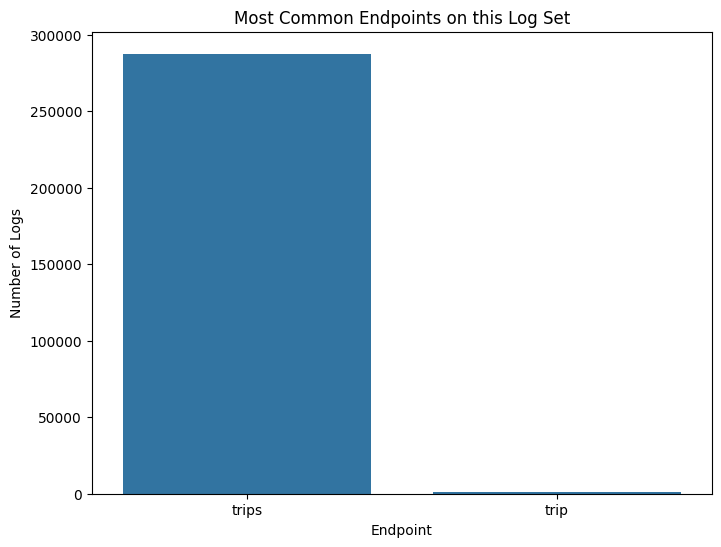

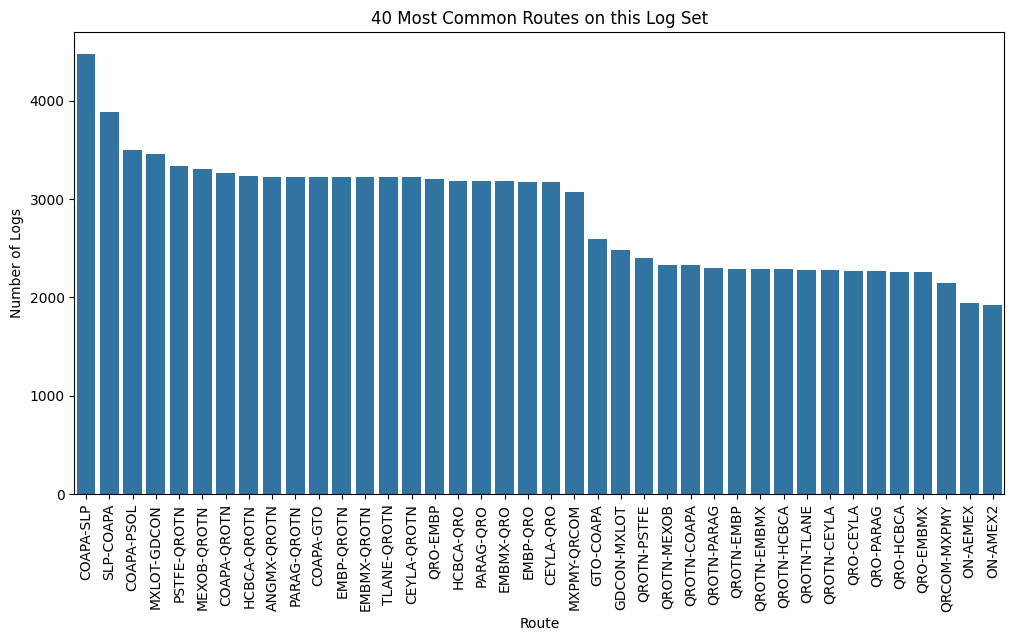

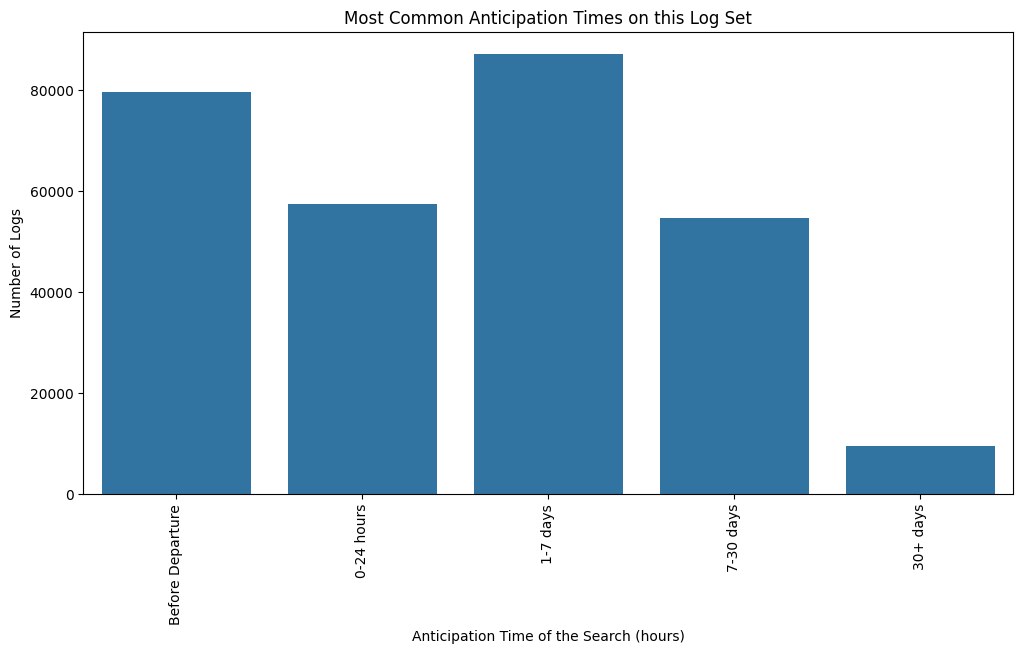

60 days of anticipation are 1440 hours
45 days of anticipation are 1080 hours
30 days of anticipation are 720 hours
15 days of anticipation are 360 hours


In [46]:
#@title Gráficas
# prompt: Read file /content/sample_data/events.export.csv and create 3 graphics: one that shows which endpoints (trips, trip, lock, reserve) are the most common with this error, a second one that shows which routes (join a new column with origin-destination) are the most common, and third which departure timestamps (on a human readable format) are the most common. Endpoints are namespace0 column.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def convert_timestamp(timestamp_millis):
  # Convert to string before int to handle potential non-numeric values
  timestamp_seconds = int(str(timestamp_millis)) / 1000
  dt = datetime.utcfromtimestamp(timestamp_seconds)
  return dt.isoformat()

# Read the CSV file
df = pd.read_csv('/content/sample_data/events_errors.csv')

# Convert departure timestamp to a human-readable format
df['departure'] = df['departure'].apply(convert_timestamp)

# Endpoint Analysis
endpoints = ['trips', 'trip', 'lock', 'unlock', 'reserve', 'login']
df_endpoints = df[df['namespace0'].isin(endpoints)]
endpoint_counts = df_endpoints['namespace0'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=endpoint_counts.index, y=endpoint_counts.values)
plt.xlabel('Endpoint')
plt.ylabel('Number of Logs')
plt.title('Most Common Endpoints on this Log Set')
plt.show()


# Route Analysis (40 most repeated)
if 'origin' in df.columns and 'destination' in df.columns:
  df['route'] = df['origin'] + '-' + df['destination']
  route_counts = df['route'].value_counts().nlargest(40)

  plt.figure(figsize=(12, 6))
  sns.barplot(x=route_counts.index, y=route_counts.values)
  plt.xlabel('Route')
  plt.ylabel('Number of Logs')
  plt.title('40 Most Common Routes on this Log Set')
  plt.xticks(rotation=90)
  plt.show()


# Anticipation Time Analysis
# Assuming 'timestamp' column contains request timestamp in milliseconds
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df['departure_datetime'] = pd.to_datetime(df['departure'])
df['anticipation_time'] = (df['departure_datetime'] - df['timestamp']).dt.total_seconds() / 3600  # In hours

bins = [float('-inf'), 0, 24, 168, 720, float('inf')]  # Before departure, 0-24h, 1-7 days, 7-30 days, 30+ days
labels = ['Before Departure', '0-24 hours', '1-7 days', '7-30 days', '30+ days']

# Create a new column with the anticipation time group
df['anticipation_group'] = pd.cut(df['anticipation_time'], bins=bins, labels=labels)

# Group by anticipation group and count occurrences
anticipation_group_counts = df['anticipation_group'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=anticipation_group_counts.index, y=anticipation_group_counts.values)
plt.xlabel('Anticipation Time of the Search (hours)')
plt.ylabel('Number of Logs')
plt.title('Most Common Anticipation Times on this Log Set')
plt.xticks(rotation=90)
plt.show()

print(f'60 days of anticipation are {(1*24)*60} hours')
print(f'45 days of anticipation are {(1*24)*45} hours')
print(f'30 days of anticipation are {(1*24)*30} hours')
print(f'15 days of anticipation are {(1*24)*15} hours')
